In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import io
import cv2
import os
import sys
import time
import glob
import csv
from skimage.morphology import reconstruction

In [2]:
%matplotlib inline 
sns.set_style('whitegrid')

In [3]:
files = []
for file1 in glob.glob(r'D:\FIREDETECTION\*'):
    for file2 in glob.glob(file1+"\*.jpg"):
        files.append([file2,file1])

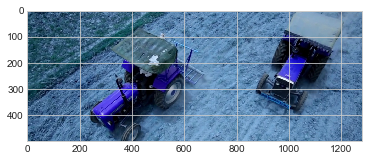

In [4]:
plt.imshow(cv2.imread(files[1175][0]))

In [5]:
files[1175][0]

'D:\\FIREDETECTION\\NOFIRE\\croppedframe171.jpg'

In [6]:
try: 
      
    # creating a folder named data 
    if not os.path.exists('data'): 
        os.makedirs('data') 
  
# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data') 

    
try: 
      
    # creating a folder named data 
    if not os.path.exists('binarydata'): 
        os.makedirs('binarydata') 
  
# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data')     
    
    
# frame 
currentframe = 0



tStart = time.time()
for i in range(len(files)):
    frame=cv2.imread(files[i][0])
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    ret, binary = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
    height, width = binary.shape
    npframe = np.array(frame)
    # nphsv = np.array(hsv)
    npbinary = np.array(binary)
    
    dst = cv2.medianBlur(binary, 5)
    
    kernal2 = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernal2)
    openning2 = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernal2)

    binary_x = 0
    Rt = 135
    St = 55
    while binary_x < height:
        binary_y = 0
        while binary_y < width:
            if (opening[binary_x, binary_y] == 255):
                p = npframe[(binary_x, binary_y)]
                if p[2] >= p[1] >= p[0]:  # & p2[2] >= 5:
                    binary_y += 1
                    continue
                else:
                    opening[binary_x, binary_y] = 0
            binary_y += 1
        binary_x += 1
    image, contour, hierarchy = cv2.findContours(opening,
                                                 cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if contour == []:
        print('contour')
    else:
        cv2.drawContours(frame, contour, -1, (0, 0, 255), 2)
        
        
    name = './data/frame' + str(currentframe) + '.jpg'
    print ('Creating...' + name) 
    # writing the extracted images 
    cv2.imwrite(name, frame)     
    
    binaryname = './binarydata/frame' + str(currentframe) + '.jpg'
    print ('Creating...' + binaryname) 
    # writing the extracted images 
    cv2.imwrite(binaryname, binary)     
    
    
    #cv2.imshow('frame', frame)  
    #cv2.imshow('binary', binary)
    # cv2.imshow('hsv', hsv)
    #    cv2.imshow('contour', opening)  
    #    cv2.imshow('opening2', openning2) 
    
    
    currentframe += 1
    
    tEnd = time.time()
    totalTime = (tEnd - tStart)
    print(tStart)
    print(tEnd)
    print('totaltime %d ' % totalTime)
    if cv2.waitKey(1) & 0xFF == 27:
        print('done!!')
        break
# tEnd = time.time()

cv2.destroyAllWindows()
# totalTime = (tEnd - tStart)
print(time.clock())
print('TOTALTIME %d ' % totalTime)

Creating..../data/frame0.jpg
Creating..../binarydata/frame0.jpg
1570269207.6317837
1570269208.8016868
totaltime 1 
contour
Creating..../data/frame1.jpg
Creating..../binarydata/frame1.jpg
1570269207.6317837
1570269209.8139849
totaltime 2 
contour
Creating..../data/frame2.jpg
Creating..../binarydata/frame2.jpg
1570269207.6317837
1570269210.7704265
totaltime 3 
contour
Creating..../data/frame3.jpg
Creating..../binarydata/frame3.jpg
1570269207.6317837
1570269211.84095
totaltime 4 
Creating..../data/frame4.jpg
Creating..../binarydata/frame4.jpg
1570269207.6317837
1570269212.7854261
totaltime 5 
contour
Creating..../data/frame5.jpg
Creating..../binarydata/frame5.jpg
1570269207.6317837
1570269213.7428436
totaltime 6 
contour
Creating..../data/frame6.jpg
Creating..../binarydata/frame6.jpg
1570269207.6317837
1570269214.705556
totaltime 7 
contour
Creating..../data/frame7.jpg
Creating..../binarydata/frame7.jpg
1570269207.6317837
1570269215.7707016
totaltime 8 
Creating..../data/frame8.jpg
Creati

contour
Creating..../data/frame68.jpg
Creating..../binarydata/frame68.jpg
1570269207.6317837
1570269278.3793883
totaltime 70 
contour
Creating..../data/frame69.jpg
Creating..../binarydata/frame69.jpg
1570269207.6317837
1570269279.4325726
totaltime 71 
contour
Creating..../data/frame70.jpg
Creating..../binarydata/frame70.jpg
1570269207.6317837
1570269280.3501563
totaltime 72 
Creating..../data/frame71.jpg
Creating..../binarydata/frame71.jpg
1570269207.6317837
1570269281.4153032
totaltime 73 
contour
Creating..../data/frame72.jpg
Creating..../binarydata/frame72.jpg
1570269207.6317837
1570269282.4038959
totaltime 74 
Creating..../data/frame73.jpg
Creating..../binarydata/frame73.jpg
1570269207.6317837
1570269283.5418596
totaltime 75 
contour
Creating..../data/frame74.jpg
Creating..../binarydata/frame74.jpg
1570269207.6317837
1570269284.479318
totaltime 76 
contour
Creating..../data/frame75.jpg
Creating..../binarydata/frame75.jpg
1570269207.6317837
1570269285.4148622
totaltime 77 
contour
C

Creating..../data/frame136.jpg
Creating..../binarydata/frame136.jpg
1570269207.6317837
1570269346.6570172
totaltime 139 
Creating..../data/frame137.jpg
Creating..../binarydata/frame137.jpg
1570269207.6317837
1570269347.5737722
totaltime 139 
Creating..../data/frame138.jpg
Creating..../binarydata/frame138.jpg
1570269207.6317837
1570269348.5112922
totaltime 140 
contour
Creating..../data/frame139.jpg
Creating..../binarydata/frame139.jpg
1570269207.6317837
1570269349.453745
totaltime 141 
Creating..../data/frame140.jpg
Creating..../binarydata/frame140.jpg
1570269207.6317837
1570269350.3653088
totaltime 142 
Creating..../data/frame141.jpg
Creating..../binarydata/frame141.jpg
1570269207.6317837
1570269351.310812
totaltime 143 
Creating..../data/frame142.jpg
Creating..../binarydata/frame142.jpg
1570269207.6317837
1570269352.2193549
totaltime 144 
Creating..../data/frame143.jpg
Creating..../binarydata/frame143.jpg
1570269207.6317837
1570269353.195853
totaltime 145 
contour
Creating..../data/f

Creating..../data/frame203.jpg
Creating..../binarydata/frame203.jpg
1570269207.6317837
1570269420.735677
totaltime 213 
Creating..../data/frame204.jpg
Creating..../binarydata/frame204.jpg
1570269207.6317837
1570269421.8070288
totaltime 214 
Creating..../data/frame205.jpg
Creating..../binarydata/frame205.jpg
1570269207.6317837
1570269422.8794582
totaltime 215 
contour
Creating..../data/frame206.jpg
Creating..../binarydata/frame206.jpg
1570269207.6317837
1570269424.0364518
totaltime 216 
contour
Creating..../data/frame207.jpg
Creating..../binarydata/frame207.jpg
1570269207.6317837
1570269425.132134
totaltime 217 
contour
Creating..../data/frame208.jpg
Creating..../binarydata/frame208.jpg
1570269207.6317837
1570269426.4486144
totaltime 218 
Creating..../data/frame209.jpg
Creating..../binarydata/frame209.jpg
1570269207.6317837
1570269427.698238
totaltime 220 
contour
Creating..../data/frame210.jpg
Creating..../binarydata/frame210.jpg
1570269207.6317837
1570269428.8165705
totaltime 221 
con

Creating..../data/frame271.jpg
Creating..../binarydata/frame271.jpg
1570269207.6317837
1570269504.8963535
totaltime 297 
Creating..../data/frame272.jpg
Creating..../binarydata/frame272.jpg
1570269207.6317837
1570269506.413792
totaltime 298 
Creating..../data/frame273.jpg
Creating..../binarydata/frame273.jpg
1570269207.6317837
1570269507.697388
totaltime 300 
Creating..../data/frame274.jpg
Creating..../binarydata/frame274.jpg
1570269207.6317837
1570269508.8732483
totaltime 301 
Creating..../data/frame275.jpg
Creating..../binarydata/frame275.jpg
1570269207.6317837
1570269510.0850048
totaltime 302 
Creating..../data/frame276.jpg
Creating..../binarydata/frame276.jpg
1570269207.6317837
1570269511.3555763
totaltime 303 
Creating..../data/frame277.jpg
Creating..../binarydata/frame277.jpg
1570269207.6317837
1570269512.795726
totaltime 305 
Creating..../data/frame278.jpg
Creating..../binarydata/frame278.jpg
1570269207.6317837
1570269514.0194523
totaltime 306 
Creating..../data/frame279.jpg
Crea

contour
Creating..../data/frame339.jpg
Creating..../binarydata/frame339.jpg
1570269207.6317837
1570269585.473351
totaltime 377 
contour
Creating..../data/frame340.jpg
Creating..../binarydata/frame340.jpg
1570269207.6317837
1570269586.6119146
totaltime 378 
contour
Creating..../data/frame341.jpg
Creating..../binarydata/frame341.jpg
1570269207.6317837
1570269587.6072447
totaltime 379 
contour
Creating..../data/frame342.jpg
Creating..../binarydata/frame342.jpg
1570269207.6317837
1570269588.6127822
totaltime 380 
contour
Creating..../data/frame343.jpg
Creating..../binarydata/frame343.jpg
1570269207.6317837
1570269589.5862155
totaltime 381 
contour
Creating..../data/frame344.jpg
Creating..../binarydata/frame344.jpg
1570269207.6317837
1570269590.5964797
totaltime 382 
contour
Creating..../data/frame345.jpg
Creating..../binarydata/frame345.jpg
1570269207.6317837
1570269591.5681586
totaltime 383 
contour
Creating..../data/frame346.jpg
Creating..../binarydata/frame346.jpg
1570269207.6317837
157

Creating..../data/frame404.jpg
Creating..../binarydata/frame404.jpg
1570269207.6317837
1570269658.668726
totaltime 451 
Creating..../data/frame405.jpg
Creating..../binarydata/frame405.jpg
1570269207.6317837
1570269659.6700482
totaltime 452 
Creating..../data/frame406.jpg
Creating..../binarydata/frame406.jpg
1570269207.6317837
1570269660.7361975
totaltime 453 
Creating..../data/frame407.jpg
Creating..../binarydata/frame407.jpg
1570269207.6317837
1570269661.8342607
totaltime 454 
Creating..../data/frame408.jpg
Creating..../binarydata/frame408.jpg
1570269207.6317837
1570269662.9732726
totaltime 455 
Creating..../data/frame409.jpg
Creating..../binarydata/frame409.jpg
1570269207.6317837
1570269664.015428
totaltime 456 
Creating..../data/frame410.jpg
Creating..../binarydata/frame410.jpg
1570269207.6317837
1570269665.0356996
totaltime 457 
Creating..../data/frame411.jpg
Creating..../binarydata/frame411.jpg
1570269207.6317837
1570269666.30331
totaltime 458 
Creating..../data/frame412.jpg
Creat

contour
Creating..../data/frame472.jpg
Creating..../binarydata/frame472.jpg
1570269207.6317837
1570269740.924774
totaltime 533 
Creating..../data/frame473.jpg
Creating..../binarydata/frame473.jpg
1570269207.6317837
1570269742.5105326
totaltime 534 
Creating..../data/frame474.jpg
Creating..../binarydata/frame474.jpg
1570269207.6317837
1570269743.7502508
totaltime 536 
Creating..../data/frame475.jpg
Creating..../binarydata/frame475.jpg
1570269207.6317837
1570269745.5115075
totaltime 537 
Creating..../data/frame476.jpg
Creating..../binarydata/frame476.jpg
1570269207.6317837
1570269746.842953
totaltime 539 
Creating..../data/frame477.jpg
Creating..../binarydata/frame477.jpg
1570269207.6317837
1570269748.6092508
totaltime 540 
Creating..../data/frame478.jpg
Creating..../binarydata/frame478.jpg
1570269207.6317837
1570269750.1700833
totaltime 542 
Creating..../data/frame479.jpg
Creating..../binarydata/frame479.jpg
1570269207.6317837
1570269751.2541792
totaltime 543 
Creating..../data/frame480

Creating..../data/frame538.jpg
Creating..../binarydata/frame538.jpg
1570269207.6317837
1570269822.8209941
totaltime 615 
contour
Creating..../data/frame539.jpg
Creating..../binarydata/frame539.jpg
1570269207.6317837
1570269823.9102747
totaltime 616 
contour
Creating..../data/frame540.jpg
Creating..../binarydata/frame540.jpg
1570269207.6317837
1570269824.9734638
totaltime 617 
contour
Creating..../data/frame541.jpg
Creating..../binarydata/frame541.jpg
1570269207.6317837
1570269826.0585308
totaltime 618 
contour
Creating..../data/frame542.jpg
Creating..../binarydata/frame542.jpg
1570269207.6317837
1570269827.134653
totaltime 619 
contour
Creating..../data/frame543.jpg
Creating..../binarydata/frame543.jpg
1570269207.6317837
1570269828.2925568
totaltime 620 
contour
Creating..../data/frame544.jpg
Creating..../binarydata/frame544.jpg
1570269207.6317837
1570269829.6559138
totaltime 622 
contour
Creating..../data/frame545.jpg
Creating..../binarydata/frame545.jpg
1570269207.6317837
1570269830.

contour
Creating..../data/frame605.jpg
Creating..../binarydata/frame605.jpg
1570269207.6317837
1570269898.283587
totaltime 690 
contour
Creating..../data/frame606.jpg
Creating..../binarydata/frame606.jpg
1570269207.6317837
1570269899.2739341
totaltime 691 
Creating..../data/frame607.jpg
Creating..../binarydata/frame607.jpg
1570269207.6317837
1570269900.5794427
totaltime 692 
contour
Creating..../data/frame608.jpg
Creating..../binarydata/frame608.jpg
1570269207.6317837
1570269901.547893
totaltime 693 
contour
Creating..../data/frame609.jpg
Creating..../binarydata/frame609.jpg
1570269207.6317837
1570269902.5212886
totaltime 694 
contour
Creating..../data/frame610.jpg
Creating..../binarydata/frame610.jpg
1570269207.6317837
1570269903.4807565
totaltime 695 
contour
Creating..../data/frame611.jpg
Creating..../binarydata/frame611.jpg
1570269207.6317837
1570269904.4352033
totaltime 696 
contour
Creating..../data/frame612.jpg
Creating..../binarydata/frame612.jpg
1570269207.6317837
1570269905.4

Creating..../data/frame672.jpg
Creating..../binarydata/frame672.jpg
1570269207.6317837
1570269973.2241082
totaltime 765 
Creating..../data/frame673.jpg
Creating..../binarydata/frame673.jpg
1570269207.6317837
1570269974.3451104
totaltime 766 
Creating..../data/frame674.jpg
Creating..../binarydata/frame674.jpg
1570269207.6317837
1570269975.593772
totaltime 767 
Creating..../data/frame675.jpg
Creating..../binarydata/frame675.jpg
1570269207.6317837
1570269976.7019565
totaltime 769 
Creating..../data/frame676.jpg
Creating..../binarydata/frame676.jpg
1570269207.6317837
1570269977.8409116
totaltime 770 
Creating..../data/frame677.jpg
Creating..../binarydata/frame677.jpg
1570269207.6317837
1570269978.9513597
totaltime 771 
Creating..../data/frame678.jpg
Creating..../binarydata/frame678.jpg
1570269207.6317837
1570269980.057368
totaltime 772 
Creating..../data/frame679.jpg
Creating..../binarydata/frame679.jpg
1570269207.6317837
1570269981.282195
totaltime 773 
Creating..../data/frame680.jpg
Crea

Creating..../data/frame740.jpg
Creating..../binarydata/frame740.jpg
1570269207.6317837
1570270059.4442222
totaltime 851 
Creating..../data/frame741.jpg
Creating..../binarydata/frame741.jpg
1570269207.6317837
1570270060.8534822
totaltime 853 
Creating..../data/frame742.jpg
Creating..../binarydata/frame742.jpg
1570269207.6317837
1570270062.4003186
totaltime 854 
Creating..../data/frame743.jpg
Creating..../binarydata/frame743.jpg
1570269207.6317837
1570270063.9801204
totaltime 856 
Creating..../data/frame744.jpg
Creating..../binarydata/frame744.jpg
1570269207.6317837
1570270065.226759
totaltime 857 
Creating..../data/frame745.jpg
Creating..../binarydata/frame745.jpg
1570269207.6317837
1570270066.6708992
totaltime 859 
Creating..../data/frame746.jpg
Creating..../binarydata/frame746.jpg
1570269207.6317837
1570270068.1240106
totaltime 860 
Creating..../data/frame747.jpg
Creating..../binarydata/frame747.jpg
1570269207.6317837
1570270069.5701494
totaltime 861 
Creating..../data/frame748.jpg
Cr

Creating..../data/frame808.jpg
Creating..../binarydata/frame808.jpg
1570269207.6317837
1570270152.7118983
totaltime 945 
Creating..../data/frame809.jpg
Creating..../binarydata/frame809.jpg
1570269207.6317837
1570270154.2724774
totaltime 946 
contour
Creating..../data/frame810.jpg
Creating..../binarydata/frame810.jpg
1570269207.6317837
1570270155.3545835
totaltime 947 
Creating..../data/frame811.jpg
Creating..../binarydata/frame811.jpg
1570269207.6317837
1570270156.4865565
totaltime 948 
Creating..../data/frame812.jpg
Creating..../binarydata/frame812.jpg
1570269207.6317837
1570270157.6693933
totaltime 950 
Creating..../data/frame813.jpg
Creating..../binarydata/frame813.jpg
1570269207.6317837
1570270158.8841927
totaltime 951 
Creating..../data/frame814.jpg
Creating..../binarydata/frame814.jpg
1570269207.6317837
1570270160.0770357
totaltime 952 
Creating..../data/frame815.jpg
Creating..../binarydata/frame815.jpg
1570269207.6317837
1570270161.5269246
totaltime 953 
Creating..../data/frame8

Creating..../data/frame876.jpg
Creating..../binarydata/frame876.jpg
1570269207.6317837
1570270233.6680558
totaltime 1026 
Creating..../data/frame877.jpg
Creating..../binarydata/frame877.jpg
1570269207.6317837
1570270234.8072073
totaltime 1027 
Creating..../data/frame878.jpg
Creating..../binarydata/frame878.jpg
1570269207.6317837
1570270235.862358
totaltime 1028 
Creating..../data/frame879.jpg
Creating..../binarydata/frame879.jpg
1570269207.6317837
1570270236.9387167
totaltime 1029 
Creating..../data/frame880.jpg
Creating..../binarydata/frame880.jpg
1570269207.6317837
1570270238.019852
totaltime 1030 
Creating..../data/frame881.jpg
Creating..../binarydata/frame881.jpg
1570269207.6317837
1570270239.0660565
totaltime 1031 
Creating..../data/frame882.jpg
Creating..../binarydata/frame882.jpg
1570269207.6317837
1570270240.109259
totaltime 1032 
Creating..../data/frame883.jpg
Creating..../binarydata/frame883.jpg
1570269207.6317837
1570270241.293099
totaltime 1033 
Creating..../data/frame884.j

Creating..../data/frame944.jpg
Creating..../binarydata/frame944.jpg
1570269207.6317837
1570270311.0929966
totaltime 1103 
Creating..../data/frame945.jpg
Creating..../binarydata/frame945.jpg
1570269207.6317837
1570270312.3894942
totaltime 1104 
Creating..../data/frame946.jpg
Creating..../binarydata/frame946.jpg
1570269207.6317837
1570270313.5214727
totaltime 1105 
Creating..../data/frame947.jpg
Creating..../binarydata/frame947.jpg
1570269207.6317837
1570270314.7153099
totaltime 1107 
Creating..../data/frame948.jpg
Creating..../binarydata/frame948.jpg
1570269207.6317837
1570270315.8382711
totaltime 1108 
Creating..../data/frame949.jpg
Creating..../binarydata/frame949.jpg
1570269207.6317837
1570270316.9673502
totaltime 1109 
Creating..../data/frame950.jpg
Creating..../binarydata/frame950.jpg
1570269207.6317837
1570270318.115259
totaltime 1110 
Creating..../data/frame951.jpg
Creating..../binarydata/frame951.jpg
1570269207.6317837
1570270319.2362776
totaltime 1111 
Creating..../data/frame95

contour
Creating..../data/frame1009.jpg
Creating..../binarydata/frame1009.jpg
1570269207.6317837
1570270388.322066
totaltime 1180 
Creating..../data/frame1010.jpg
Creating..../binarydata/frame1010.jpg
1570269207.6317837
1570270389.5916696
totaltime 1181 
contour
Creating..../data/frame1011.jpg
Creating..../binarydata/frame1011.jpg
1570269207.6317837
1570270390.8592799
totaltime 1183 
contour
Creating..../data/frame1012.jpg
Creating..../binarydata/frame1012.jpg
1570269207.6317837
1570270392.1119313
totaltime 1184 
contour
Creating..../data/frame1013.jpg
Creating..../binarydata/frame1013.jpg
1570269207.6317837
1570270393.4194353
totaltime 1185 
contour
Creating..../data/frame1014.jpg
Creating..../binarydata/frame1014.jpg
1570269207.6317837
1570270394.7020047
totaltime 1187 
Creating..../data/frame1015.jpg
Creating..../binarydata/frame1015.jpg
1570269207.6317837
1570270396.0466905
totaltime 1188 
contour
Creating..../data/frame1016.jpg
Creating..../binarydata/frame1016.jpg
1570269207.6317

contour
Creating..../data/frame1073.jpg
Creating..../binarydata/frame1073.jpg
1570269207.6317837
1570270471.7582686
totaltime 1264 
contour
Creating..../data/frame1074.jpg
Creating..../binarydata/frame1074.jpg
1570269207.6317837
1570270473.128604
totaltime 1265 
contour
Creating..../data/frame1075.jpg
Creating..../binarydata/frame1075.jpg
1570269207.6317837
1570270474.4081826
totaltime 1266 
contour
Creating..../data/frame1076.jpg
Creating..../binarydata/frame1076.jpg
1570269207.6317837
1570270475.7236667
totaltime 1268 
Creating..../data/frame1077.jpg
Creating..../binarydata/frame1077.jpg
1570269207.6317837
1570270477.3503144
totaltime 1269 
contour
Creating..../data/frame1078.jpg
Creating..../binarydata/frame1078.jpg
1570269207.6317837
1570270478.7266343
totaltime 1271 
contour
Creating..../data/frame1079.jpg
Creating..../binarydata/frame1079.jpg
1570269207.6317837
1570270479.9264247
totaltime 1272 
Creating..../data/frame1080.jpg
Creating..../binarydata/frame1080.jpg
1570269207.6317

Creating..../data/frame1139.jpg
Creating..../binarydata/frame1139.jpg
1570269207.6317837
1570270546.74847
totaltime 1339 
Creating..../data/frame1140.jpg
Creating..../binarydata/frame1140.jpg
1570269207.6317837
1570270547.7704082
totaltime 1340 
Creating..../data/frame1141.jpg
Creating..../binarydata/frame1141.jpg
1570269207.6317837
1570270548.8674736
totaltime 1341 
Creating..../data/frame1142.jpg
Creating..../binarydata/frame1142.jpg
1570269207.6317837
1570270549.864805
totaltime 1342 
Creating..../data/frame1143.jpg
Creating..../binarydata/frame1143.jpg
1570269207.6317837
1570270550.8800905
totaltime 1343 
Creating..../data/frame1144.jpg
Creating..../binarydata/frame1144.jpg
1570269207.6317837
1570270551.864457
totaltime 1344 
Creating..../data/frame1145.jpg
Creating..../binarydata/frame1145.jpg
1570269207.6317837
1570270553.1121204
totaltime 1345 
Creating..../data/frame1146.jpg
Creating..../binarydata/frame1146.jpg
1570269207.6317837
1570270554.137379
totaltime 1346 
Creating..../

Creating..../data/frame1206.jpg
Creating..../binarydata/frame1206.jpg
1570269207.6317837
1570270618.9923463
totaltime 1411 
Creating..../data/frame1207.jpg
Creating..../binarydata/frame1207.jpg
1570269207.6317837
1570270620.0176046
totaltime 1412 
Creating..../data/frame1208.jpg
Creating..../binarydata/frame1208.jpg
1570269207.6317837
1570270621.375974
totaltime 1413 
contour
Creating..../data/frame1209.jpg
Creating..../binarydata/frame1209.jpg
1570269207.6317837
1570270622.4690487
totaltime 1414 
Creating..../data/frame1210.jpg
Creating..../binarydata/frame1210.jpg
1570269207.6317837
1570270623.6798854
totaltime 1416 
Creating..../data/frame1211.jpg
Creating..../binarydata/frame1211.jpg
1570269207.6317837
1570270624.9917247
totaltime 1417 
Creating..../data/frame1212.jpg
Creating..../binarydata/frame1212.jpg
1570269207.6317837
1570270626.1037486
totaltime 1418 
Creating..../data/frame1213.jpg
Creating..../binarydata/frame1213.jpg
1570269207.6317837
1570270627.1689005
totaltime 1419 
C

Creating..../data/frame1272.jpg
Creating..../binarydata/frame1272.jpg
1570269207.6317837
1570270691.5160465
totaltime 1483 
contour
Creating..../data/frame1273.jpg
Creating..../binarydata/frame1273.jpg
1570269207.6317837
1570270692.5113842
totaltime 1484 
contour
Creating..../data/frame1274.jpg
Creating..../binarydata/frame1274.jpg
1570269207.6317837
1570270693.5456185
totaltime 1485 
Creating..../data/frame1275.jpg
Creating..../binarydata/frame1275.jpg
1570269207.6317837
1570270694.593816
totaltime 1486 
Creating..../data/frame1276.jpg
Creating..../binarydata/frame1276.jpg
1570269207.6317837
1570270695.6021194
totaltime 1487 
Creating..../data/frame1277.jpg
Creating..../binarydata/frame1277.jpg
1570269207.6317837
1570270696.6463265
totaltime 1489 
Creating..../data/frame1278.jpg
Creating..../binarydata/frame1278.jpg
1570269207.6317837
1570270697.682571
totaltime 1490 
Creating..../data/frame1279.jpg
Creating..../binarydata/frame1279.jpg
1570269207.6317837
1570270698.7487183
totaltime 

contour
Creating..../data/frame1338.jpg
Creating..../binarydata/frame1338.jpg
1570269207.6317837
1570270765.0201666
totaltime 1557 
Creating..../data/frame1339.jpg
Creating..../binarydata/frame1339.jpg
1570269207.6317837
1570270766.0144966
totaltime 1558 
Creating..../data/frame1340.jpg
Creating..../binarydata/frame1340.jpg
1570269207.6317837
1570270767.0657406
totaltime 1559 
Creating..../data/frame1341.jpg
Creating..../binarydata/frame1341.jpg
1570269207.6317837
1570270768.0909836
totaltime 1560 
Creating..../data/frame1342.jpg
Creating..../binarydata/frame1342.jpg
1570269207.6317837
1570270769.3556035
totaltime 1561 
Creating..../data/frame1343.jpg
Creating..../binarydata/frame1343.jpg
1570269207.6317837
1570270770.366959
totaltime 1562 
Creating..../data/frame1344.jpg
Creating..../binarydata/frame1344.jpg
1570269207.6317837
1570270771.361273
totaltime 1563 
Creating..../data/frame1345.jpg
Creating..../binarydata/frame1345.jpg
1570269207.6317837
1570270772.3606262
totaltime 1564 
Cr

Creating..../data/frame1404.jpg
Creating..../binarydata/frame1404.jpg
1570269207.6317837
1570270834.9264824
totaltime 1627 
Creating..../data/frame1405.jpg
Creating..../binarydata/frame1405.jpg
1570269207.6317837
1570270835.9826584
totaltime 1628 
Creating..../data/frame1406.jpg
Creating..../binarydata/frame1406.jpg
1570269207.6317837
1570270837.0517995
totaltime 1629 
Creating..../data/frame1407.jpg
Creating..../binarydata/frame1407.jpg
1570269207.6317837
1570270838.070287
totaltime 1630 
Creating..../data/frame1408.jpg
Creating..../binarydata/frame1408.jpg
1570269207.6317837
1570270839.3179493
totaltime 1631 
Creating..../data/frame1409.jpg
Creating..../binarydata/frame1409.jpg
1570269207.6317837
1570270840.349223
totaltime 1632 
Creating..../data/frame1410.jpg
Creating..../binarydata/frame1410.jpg
1570269207.6317837
1570270841.3894086
totaltime 1633 
Creating..../data/frame1411.jpg
Creating..../binarydata/frame1411.jpg
1570269207.6317837
1570270842.421649
totaltime 1634 
Creating...

Creating..../data/frame1470.jpg
Creating..../binarydata/frame1470.jpg
1570269207.6317837
1570270909.0258863
totaltime 1701 
Creating..../data/frame1471.jpg
Creating..../binarydata/frame1471.jpg
1570269207.6317837
1570270910.094031
totaltime 1702 
Creating..../data/frame1472.jpg
Creating..../binarydata/frame1472.jpg
1570269207.6317837
1570270911.1409736
totaltime 1703 
Creating..../data/frame1473.jpg
Creating..../binarydata/frame1473.jpg
1570269207.6317837
1570270912.20809
totaltime 1704 
Creating..../data/frame1474.jpg
Creating..../binarydata/frame1474.jpg
1570269207.6317837
1570270913.2413259
totaltime 1705 
Creating..../data/frame1475.jpg
Creating..../binarydata/frame1475.jpg
1570269207.6317837
1570270914.2825642
totaltime 1706 
Creating..../data/frame1476.jpg
Creating..../binarydata/frame1476.jpg
1570269207.6317837
1570270915.3068051
totaltime 1707 
Creating..../data/frame1477.jpg
Creating..../binarydata/frame1477.jpg
1570269207.6317837
1570270916.3729532
totaltime 1708 
Creating...

Creating..../data/frame1537.jpg
Creating..../binarydata/frame1537.jpg
1570269207.6317837
1570270979.9190753
totaltime 1772 
Creating..../data/frame1538.jpg
Creating..../binarydata/frame1538.jpg
1570269207.6317837
1570270981.019163
totaltime 1773 
Creating..../data/frame1539.jpg
Creating..../binarydata/frame1539.jpg
1570269207.6317837
1570270982.2233274
totaltime 1774 
Creating..../data/frame1540.jpg
Creating..../binarydata/frame1540.jpg
1570269207.6317837
1570270983.2994478
totaltime 1775 
Creating..../data/frame1541.jpg
Creating..../binarydata/frame1541.jpg
1570269207.6317837
1570270984.3177245
totaltime 1776 
Creating..../data/frame1542.jpg
Creating..../binarydata/frame1542.jpg
1570269207.6317837
1570270985.3948822
totaltime 1777 
Creating..../data/frame1543.jpg
Creating..../binarydata/frame1543.jpg
1570269207.6317837
1570270986.3862028
totaltime 1778 
contour
Creating..../data/frame1544.jpg
Creating..../binarydata/frame1544.jpg
1570269207.6317837
1570270987.3935378
totaltime 1779 
C

Creating..../data/frame1604.jpg
Creating..../binarydata/frame1604.jpg
1570269207.6317837
1570271052.1782699
totaltime 1844 
Creating..../data/frame1605.jpg
Creating..../binarydata/frame1605.jpg
1570269207.6317837
1570271053.2952905
totaltime 1845 
Creating..../data/frame1606.jpg
Creating..../binarydata/frame1606.jpg
1570269207.6317837
1570271054.349462
totaltime 1846 
Creating..../data/frame1607.jpg
Creating..../binarydata/frame1607.jpg
1570269207.6317837
1570271055.4445374
totaltime 1847 
Creating..../data/frame1608.jpg
Creating..../binarydata/frame1608.jpg
1570269207.6317837
1570271056.4468582
totaltime 1848 
Creating..../data/frame1609.jpg
Creating..../binarydata/frame1609.jpg
1570269207.6317837
1570271057.557882
totaltime 1849 
Creating..../data/frame1610.jpg
Creating..../binarydata/frame1610.jpg
1570269207.6317837
1570271058.5801802
totaltime 1850 
Creating..../data/frame1611.jpg
Creating..../binarydata/frame1611.jpg
1570269207.6317837
1570271059.5874548
totaltime 1851 
Creating..

Creating..../data/frame1671.jpg
Creating..../binarydata/frame1671.jpg
1570269207.6317837
1570271122.2604883
totaltime 1914 
Creating..../data/frame1672.jpg
Creating..../binarydata/frame1672.jpg
1570269207.6317837
1570271123.2761872
totaltime 1915 
Creating..../data/frame1673.jpg
Creating..../binarydata/frame1673.jpg
1570269207.6317837
1570271124.3110049
totaltime 1916 
Creating..../data/frame1674.jpg
Creating..../binarydata/frame1674.jpg
1570269207.6317837
1570271125.3073401
totaltime 1917 
Creating..../data/frame1675.jpg
Creating..../binarydata/frame1675.jpg
1570269207.6317837
1570271126.3076653
totaltime 1918 
Creating..../data/frame1676.jpg
Creating..../binarydata/frame1676.jpg
1570269207.6317837
1570271127.331927
totaltime 1919 
Creating..../data/frame1677.jpg
Creating..../binarydata/frame1677.jpg
1570269207.6317837
1570271128.3372426
totaltime 1920 
Creating..../data/frame1678.jpg
Creating..../binarydata/frame1678.jpg
1570269207.6317837
1570271129.4283202
totaltime 1921 
Creating.